# Лабораторная работа 6. Отслеживание движущихся объектов

Источники:

1. https://myrusakov.ru/python-opencv-move-detection.html
2. Стр. 90 книги Дэвис, Терк. Компьютерное зрение


# Обнаружение движения на 2-х кадрах

In [ ]:
import cv2
import matplotlib.pyplot as plt

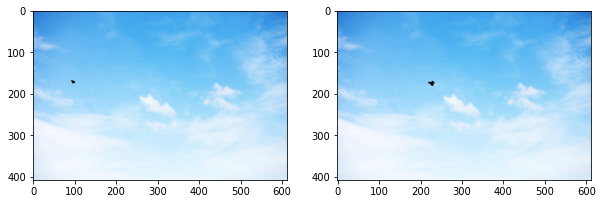

In [ ]:
frame1 = cv2.imread('1.png')
frame2 = cv2.imread('2.png')
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))

354.0
219.5


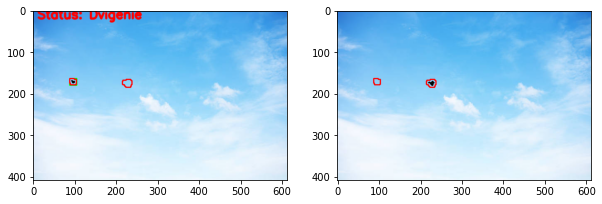

In [ ]:
diff = cv2.absdiff(frame1, frame2) # нахождение разницы двух кадров, которая проявляется лишь при изменении одного из них, т.е. с этого момента наша программа реагирует на любое движение.
gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY) # перевод кадров в черно-белую градацию
blur = cv2.GaussianBlur(gray, (5, 5), 0) # фильтрация лишних контуров
_, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY) # метод для выделения кромки объекта белым цветом
dilated = cv2.dilate(thresh, None, iterations = 3) # данный метод противоположен методу erosion(), т.е. эрозии объекта, и расширяет выделенную на предыдущем этапе область
сontours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # нахождение массива контурных точек

for contour in сontours:
    (x, y, w, h) = cv2.boundingRect(contour) # преобразование массива из предыдущего этапа в кортеж из четырех координат

# метод contourArea() по заданным contour точкам, здесь кортежу, вычисляет площадь зафиксированного объекта в каждый момент времени, это можно проверить
    print(cv2.contourArea(contour))

cv2.rectangle(frame1, (x, y), (x+w, y+h), (0, 255, 0), 2) # получение прямоугольника из точек кортежа
cv2.putText(frame1, "Status: {}".format("Dvigenie"), (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3, cv2.LINE_AA) # вставляем текст
cv2.drawContours(frame1, сontours, -1, (0, 0, 255), 2) # также можно было просто нарисовать контур объекта
cv2.drawContours(frame2, сontours, -1, (0, 0, 255), 2) # также можно было просто нарисовать контур объекта
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))

# Обнаружение движения на видеопотоке. Пример.

Представленный ниже код следует запускать в IDE, в Colab он не будет выполнен.

In [ ]:
import cv2 # импорт модуля cv2

#cv2.VideoCapture("видеофайл.mp4"); вывод кадров из видео файла
cap = cv2.VideoCapture(0); # видео поток с веб камеры
cap.set(3,1280) # установка размера окна
cap.set(4,700)
ret, frame1 = cap.read()
ret, frame2 = cap.read()
while cap.isOpened(): # метод isOpened() выводит статус видеопотока
  diff = cv2.absdiff(frame1, frame2) # нахождение разницы двух кадров, которая проявляется лишь при изменении одного из них, т.е. с этого момента наша программа реагирует на любое движение.
  gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY) # перевод кадров в черно-белую градацию
  blur = cv2.GaussianBlur(gray, (5, 5), 0) # фильтрация лишних контуров
  _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY) # метод для выделения кромки объекта белым цветом
  dilated = cv2.dilate(thresh, None, iterations = 3) # данный метод противоположен методу erosion(), т.е. эрозии объекта, и расширяет выделенную на предыдущем этапе область
  сontours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # нахождение массива контурных точек

  for contour in сontours:
    (x, y, w, h) = cv2.boundingRect(contour) # преобразование массива из предыдущего этапа в кортеж из четырех координат
    # метод contourArea() по заданным contour точкам, здесь кортежу, вычисляет площадь зафиксированного объекта в каждый момент времени, это можно проверить
    print(cv2.contourArea(contour))
    if cv2.contourArea(contour) < 700: # условие при котором площадь выделенного объекта меньше 700 px
      continue
    cv2.rectangle(frame1, (x, y), (x+w, y+h), (0, 255, 0), 2) # получение прямоугольника из точек кортежа
    cv2.putText(frame1, "Status: {}".format("Dvigenie"), (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3, cv2.LINE_AA) # вставляем текст

  #cv2.drawContours(frame1, сontours, -1, (0, 255, 0), 2) также можно было просто нарисовать контур объекта
  cv2.imshow("frame1", frame1)
  frame1 = frame2  #
  ret, frame2 = cap.read() #
  if cv2.waitKey(40) == 27:
    break

cap.release()
cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

# Задания:

1. Взять последовательность изображений или видео (4-5 кадров) на различную тематику: движение автомобиля, самолета, человека и т.п. Желательно использовать изображения с простым фоном.
2. Применить к этим кадрам последовательно алгоритм поиска движущихся объектов
3. Отразить траекторию движения объекта на начальном (первом) изображении с использованием функции рисования фигур cv2
4. Перенести траекторию движения объекта на 2D-плоскость с сохранением направления движения и ключевых точек нахождения объекта на каждом из кадров.
5. Вывести результат на экран.

# Контрольные вопросы:

1. Функция cv2.absdiff
2. Последовательность преобразований GaussianBlur, threshold, dilate
3. Функция cv2.boundingRect
4. Функция cv2.contourArea
5. Принцип работы алгоритма обнаружения движения
6. Что значит вычитание фона?
7. Какие еще есть способы обнаружения движения?
8. Какие способы позволяют улучшить алгоритмы обнаружения движения, не используя нейронные сети?